In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.callback.fp16 import *

Designate Path of Dog Pictures

In [2]:
path = (r'C:\Users\dfent\Dog Breed Pictures')


Verify that path is associated with correct files.

In [3]:
fns = get_image_files(path)
fns


(#19032) [Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_1.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_10.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_100.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_11.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_12.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_13.JPG'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_14.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_15.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_16.jpg'),Path('C:/Users/dfent/Dog Breed Pictures/Affenpinscher/Image_17.jpg')...]

Verify images and show how many images failed.

In [4]:
failed = verify_images(fns)
failed

(#0) []

Initialize data block, with formatting.

In [5]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=.75))

Create dataloader, show test batch for dataloader.

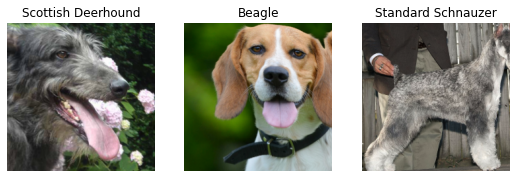

In [6]:
dls = dogs.dataloaders(path,num_workers=0)
dls.show_batch(nrows=1, ncols=3)

Train learner.

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fit_one_cycle(5, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.423478,1.150711,0.347084,08:15
1,1.541156,0.939066,0.288755,08:15


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

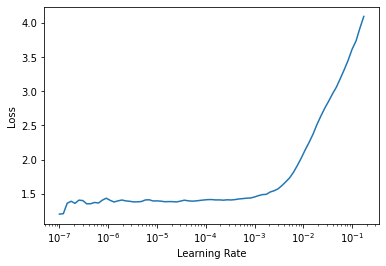

In [9]:
learn.unfreeze()
learn.lr_find()

In [10]:
learn.fit_one_cycle(5, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.438270,0.917525,0.279821,10:24
1,1.391202,0.882746,0.266159,09:08
2,1.354728,0.862250,0.264582,08:22
3,1.320033,0.848255,0.258014,08:16
4,1.323298,0.853130,0.260116,08:15


Classify pictures on loss, show top 100 losses.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(100, nrows=100)        

Create batch of our model to view activations of model.

In [ ]:
x,y = dls.one_batch()
y

View predictions for each individual dog breed, and show that the sum of all predictions is 1

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

In [ ]:
len(preds[0]),preds[0].sum()

Determine and print optimum learning rate.

In [ ]:
learn= cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()



In [ ]:
print(f'Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')